# Movie Recommender

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [5]:
movies=pd.read_csv("../datasets/movie/tmdb_5000_movies.csv")
credits=pd.read_csv("../datasets/movie/tmdb_5000_credits.csv")

In [6]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
movies.shape

(4803, 20)

In [8]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [9]:
credits.shape

(4803, 4)

### merge data

In [10]:
movies=movies.merge(credits,on="title")
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


### Keep only necessary columns


In [11]:
movies = movies[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew','popularity','vote_average']]
movies.dropna(inplace=True)
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew,popularity,vote_average
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",150.437577,7.2


## Functions to process complex columns

In [12]:
def convert(obj):
    names = []
    try:
        for i in ast.literal_eval(obj):
            names.append(i['name'])
    except (ValueError, SyntaxError):
        pass  # skip this row
    return names


In [13]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [14]:
movies['genres']= movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)


In [15]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew,popularity,vote_average
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",150.437577,7.2


In [16]:
movies['cast']=movies['cast'].apply(lambda x: convert(x)[:3])

##  Function to process the crew who is only director

In [17]:
movies.iloc[10].crew

'[{"credit_id": "553bef6a9251416874003c8f", "department": "Production", "gender": 2, "id": 3276, "job": "Casting", "name": "Roger Mussenden"}, {"credit_id": "553bee5592514135c800283e", "department": "Production", "gender": 2, "id": 3805, "job": "Producer", "name": "Jon Peters"}, {"credit_id": "52fe42f8c3a36847f8030bb1", "department": "Production", "gender": 0, "id": 13192, "job": "Production Manager", "name": "Diane Macke"}, {"credit_id": "553bee6692514157f0000b54", "department": "Production", "gender": 2, "id": 10953, "job": "Producer", "name": "Gilbert Adler"}, {"credit_id": "52fe42f8c3a36847f8030b6f", "department": "Directing", "gender": 2, "id": 9032, "job": "Director", "name": "Bryan Singer"}, {"credit_id": "52fe42f8c3a36847f8030b75", "department": "Production", "gender": 2, "id": 9032, "job": "Producer", "name": "Bryan Singer"}, {"credit_id": "553bee83c3a36820ec002201", "department": "Writing", "gender": 2, "id": 9032, "job": "Story", "name": "Bryan Singer"}, {"credit_id": "553be

In [18]:
def get_director(obj):
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            return i['name']
    return ""

In [16]:
get_director('[{"credit_id": "553bef6a9251416874003c8f", "department": "Production", "gender": 2, "id": 3276, "job": "Casting", "name": "Roger Mussenden"}, {"credit_id": "553bee5592514135c800283e", "department": "Production", "gender": 2, "id": 3805, "job": "Producer", "name": "Jon Peters"}, {"credit_id": "52fe42f8c3a36847f8030bb1", "department": "Production", "gender": 0, "id": 13192, "job": "Production Manager", "name": "Diane Macke"}, {"credit_id": "553bee6692514157f0000b54", "department": "Production", "gender": 2, "id": 10953, "job": "Producer", "name": "Gilbert Adler"}, {"credit_id": "52fe42f8c3a36847f8030b6f", "department": "Directing", "gender": 2, "id": 9032, "job": "Director", "name": "Bryan Singer"}, {"credit_id": "52fe42f8c3a36847f8030b75", "department": "Production", "gender": 2, "id": 9032, "job": "Producer", "name": "Bryan Singer"}, {"credit_id": "553bee83c3a36820ec002201", "department": "Writing", "gender": 2, "id": 9032, "job": "Story", "name": "Bryan Singer"}, {"credit_id": "553bef4dc3a368784500af4a", "department": "Editing", "gender": 2, "id": 9039, "job": "Editor", "name": "John Ottman"}, {"credit_id": "52fe42f8c3a36847f8030b87", "department": "Sound", "gender": 2, "id": 9039, "job": "Original Music Composer", "name": "John Ottman"}, {"credit_id": "52fe42f8c3a36847f8030b81", "department": "Camera", "gender": 0, "id": 9040, "job": "Director of Photography", "name": "Newton Thomas Sigel"}, {"credit_id": "52fe42f8c3a36847f8030b7b", "department": "Writing", "gender": 2, "id": 11012, "job": "Screenplay", "name": "Michael Dougherty"}, {"credit_id": "553bee92925141275e005a32", "department": "Writing", "gender": 2, "id": 11012, "job": "Story", "name": "Michael Dougherty"}, {"credit_id": "553beeb59251413f5a0063aa", "department": "Writing", "gender": 0, "id": 20007, "job": "Characters", "name": "Jerry Siegel"}, {"credit_id": "553beec3c3a3685cf8005e69", "department": "Writing", "gender": 0, "id": 20008, "job": "Characters", "name": "Joe Shuster"}, {"credit_id": "553bef15c3a368784500af42", "department": "Production", "gender": 2, "id": 21697, "job": "Executive Producer", "name": "Chris Lee"}, {"credit_id": "553beef7925141275e005a3c", "department": "Production", "gender": 0, "id": 54211, "job": "Executive Producer", "name": "Thomas Tull"}, {"credit_id": "553bef06c3a36831dd00c699", "department": "Production", "gender": 2, "id": 54212, "job": "Executive Producer", "name": "William Fay"}, {"credit_id": "553bef3a9251412c270017fe", "department": "Editing", "gender": 0, "id": 11017, "job": "Editor", "name": "Elliot Graham"}, {"credit_id": "553bef22c3a36874620005d6", "department": "Production", "gender": 2, "id": 60245, "job": "Executive Producer", "name": "Scott Mednick"}, {"credit_id": "553bef5ac3a3683c4800288f", "department": "Production", "gender": 1, "id": 61624, "job": "Casting", "name": "Ann Robinson"}, {"credit_id": "553bee75c3a368784500af32", "department": "Writing", "gender": 2, "id": 11013, "job": "Screenplay", "name": "Dan Harris"}, {"credit_id": "553bee9fc3a36874620005c9", "department": "Writing", "gender": 2, "id": 11013, "job": "Story", "name": "Dan Harris"}, {"credit_id": "553beee8c3a36874620005cf", "department": "Production", "gender": 0, "id": 1121617, "job": "Co-Producer", "name": "Stephen Jones"}, {"credit_id": "553bf01dc3a36831dd00c6b1", "department": "Art", "gender": 0, "id": 1271644, "job": "Production Design", "name": "Guy Hendrix Dyas"}]'
)

'Bryan Singer'

## Apply processing functions

In [19]:
movies['crew'] = movies['crew'].apply(get_director)

In [20]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew,popularity,vote_average
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,150.437577,7.2


### Remove spaces and lowercase everything for consistency

In [21]:
movies['genres'] = movies['genres'].apply(lambda x: [i.replace(" ", "").lower() for i in x])

In [22]:
movies['keywords'] = movies['keywords'].apply(lambda x: [i.replace(" ", "").lower() for i in x])
movies['cast'] = movies['cast'].apply(lambda x: [i.replace(" ", "").lower() for i in x])
movies['crew'] = movies['crew'].apply(lambda x: x.replace(" ", "").lower())

In [23]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew,popularity,vote_average
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[action, adventure, fantasy, sciencefiction]","[cultureclash, future, spacewar, spacecolony, ...","[samworthington, zoesaldana, sigourneyweaver]",jamescameron,150.437577,7.2


### Top 10 Genres by Movie Count

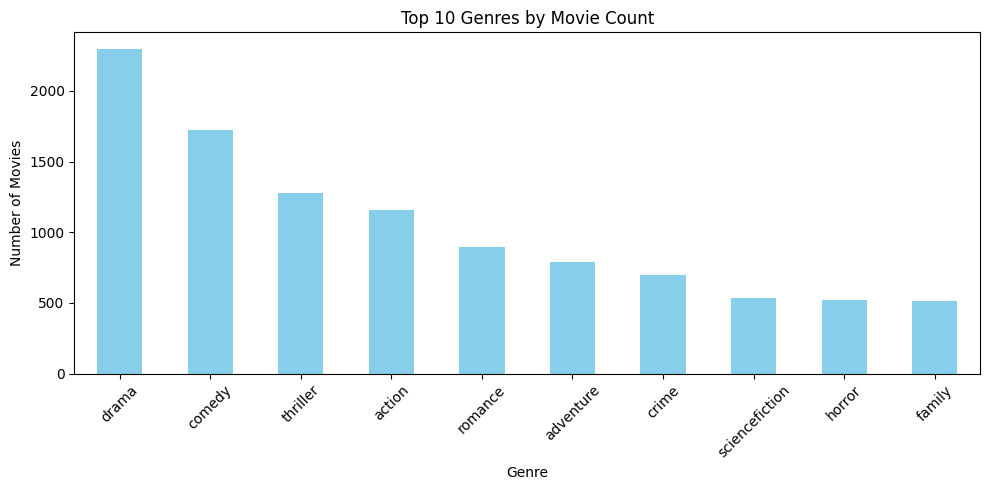

In [24]:
genre_counts = movies.explode('genres')['genres'].value_counts().head(10)

plt.figure(figsize=(10,5))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres by Movie Count')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 10 Cast Members by Frequency

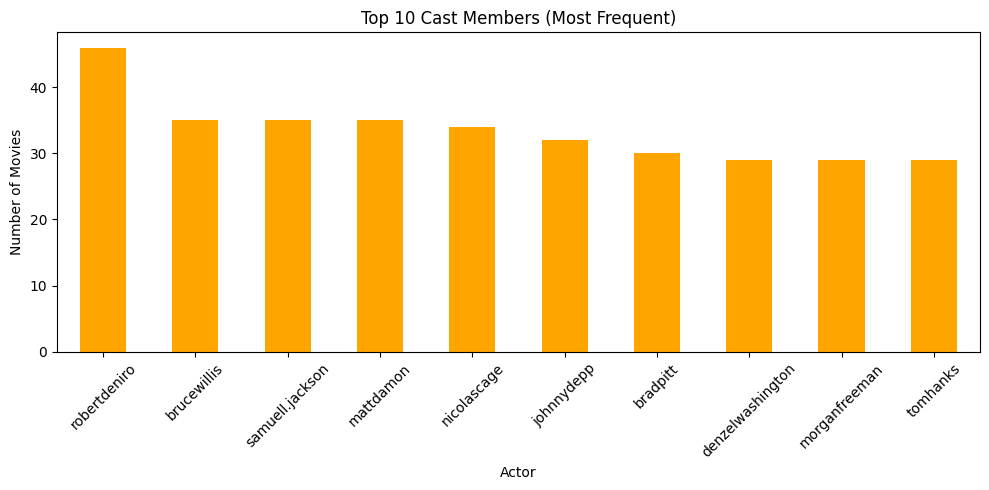

In [25]:
top_cast = movies.explode('cast')['cast'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_cast.plot(kind='bar', color='orange')
plt.title('Top 10 Cast Members (Most Frequent)')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Top 10 Directors

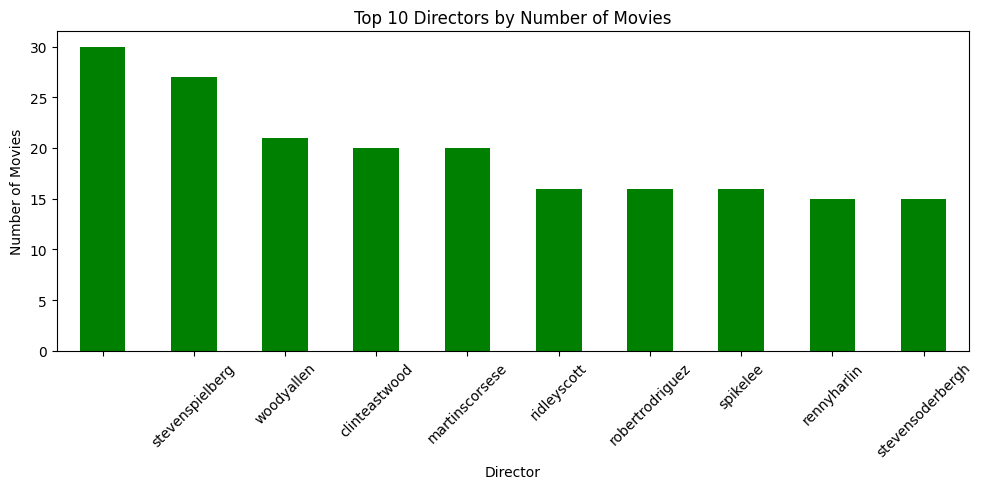

In [26]:
top_directors = movies['crew'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_directors.plot(kind='bar', color='green')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
movies['overview']=movies['overview'].apply(lambda x:x.lower().split())

In [28]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew,popularity,vote_average
0,19995,Avatar,"[in, the, 22nd, century,, a, paraplegic, marin...","[action, adventure, fantasy, sciencefiction]","[cultureclash, future, spacewar, spacecolony, ...","[samworthington, zoesaldana, sigourneyweaver]",jamescameron,150.437577,7.2


## Create Tags Column

In [29]:
movies['tags'] = (
    movies['overview'] +
    movies['genres'] +
    movies['keywords'] +
    movies['cast'] +
    movies['crew'].apply(lambda x: [x])  # director as a list
)

In [30]:
movies['tags'].apply(lambda x: " ".join(x))

0       in the 22nd century, a paraplegic marine is di...
1       captain barbossa, long believed to be dead, ha...
2       a cryptic message from bond’s past sends him o...
3       following the death of district attorney harve...
4       john carter is a war-weary, former military ca...
                              ...                        
4804    el mariachi just wants to play his guitar and ...
4805    a newlywed couple's honeymoon is upended by th...
4806    "signed, sealed, delivered" introduces a dedic...
4807    when ambitious new york attorney sam is sent t...
4808    ever since the second grade when he first saw ...
Name: tags, Length: 4806, dtype: object

In [31]:
movies.iloc[0].tags

['in',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'action',
 'adventure',
 'fantasy',
 'sciencefiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'samworthington',
 'zoesaldana',
 'sigourneyweaver',
 'jamescameron']

In [32]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew,popularity,vote_average,tags
0,19995,Avatar,"[in, the, 22nd, century,, a, paraplegic, marin...","[action, adventure, fantasy, sciencefiction]","[cultureclash, future, spacewar, spacecolony, ...","[samworthington, zoesaldana, sigourneyweaver]",jamescameron,150.437577,7.2,"[in, the, 22nd, century,, a, paraplegic, marin..."


In [52]:
new_movies_list = movies.drop(columns=['keywords'])


In [53]:
new_movies_list.head(4)

,movie_id,title,overview,genres,cast,crew,popularity,vote_average,tags
0,19995,Avatar,"[in, the, 22nd, century,, a, paraplegic, marin...","[action, adventure, fantasy, sciencefiction]","[samworthington, zoesaldana, sigourneyweaver]",jamescameron,150.437577,7.2,"[in, the, 22nd, century,, a, paraplegic, marin..."
1,285,Pirates of the Caribbean: At World's End,"[captain, barbossa,, long, believed, to, be, d...","[adventure, fantasy, action]","[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,139.082615,6.9,"[captain, barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[a, cryptic, message, from, bond’s, past, send...","[action, adventure, crime]","[danielcraig, christophwaltz, léaseydoux]",sammendes,107.376788,6.3,"[a, cryptic, message, from, bond’s, past, send..."
3,49026,The Dark Knight Rises,"[following, the, death, of, district, attorney...","[action, crime, drama, thriller]","[christianbale, michaelcaine, garyoldman]",christophernolan,112.312950,7.6,"[following, the, death, of, district, attorney..."


In [54]:
new_movies_list['tags'] =new_movies_list['tags'].apply(lambda x: " ".join(x))

## Content-Based Filtering

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [56]:
# Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')


In [57]:
vectors = vectorizer.fit_transform(new_movies_list['tags']).toarray()

In [58]:
# Similarity matrix
similarity = cosine_similarity(vectors)

### Recommendation Function

In [59]:
def recommend(movie_title):
    try:
        idx = new_movies_list[new_movies_list['title'] == movie_title].index[0]
    except IndexError:
        print(f"Movie '{movie_title}' not found in dataset.")
        return

    distances = list(enumerate(similarity[idx]))
    sorted_distances = sorted(distances, key=lambda x: x[1], reverse=True)[1:6]

    print(f"\n📽️ Recommended for '{movie_title}':")
    for i in sorted_distances:
        print("→", movies.iloc[i[0]].title)


In [60]:
new_movies_list.head(20)

,movie_id,title,overview,genres,cast,crew,popularity,vote_average,tags
0,19995,Avatar,"[in, the, 22nd, century,, a, paraplegic, marin...","[action, adventure, fantasy, sciencefiction]","[samworthington, zoesaldana, sigourneyweaver]",jamescameron,150.437577,7.2,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[captain, barbossa,, long, believed, to, be, d...","[adventure, fantasy, action]","[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,139.082615,6.9,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[a, cryptic, message, from, bond’s, past, send...","[action, adventure, crime]","[danielcraig, christophwaltz, léaseydoux]",sammendes,107.376788,6.3,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,"[following, the, death, of, district, attorney...","[action, crime, drama, thriller]","[christianbale, michaelcaine, garyoldman]",christophernolan,112.312950,7.6,following the death of district attorney harve...
4,49529,John Carter,"[john, carter, is, a, war-weary,, former, mili...","[action, adventure, sciencefiction]","[taylorkitsch, lynncollins, samanthamorton]",andrewstanton,43.926995,6.1,"john carter is a war-weary, former military ca..."
5,559,Spider-Man 3,"[the, seemingly, invincible, spider-man, goes,...","[fantasy, action, adventure]","[tobeymaguire, kirstendunst, jamesfranco]",samraimi,115.699814,5.9,the seemingly invincible spider-man goes up ag...
6,38757,Tangled,"[when, the, kingdom's, most, wanted-and, most,...","[animation, family]","[zacharylevi, mandymoore, donnamurphy]",byronhoward,48.681969,7.4,when the kingdom's most wanted-and most charmi...
7,99861,Avengers: Age of Ultron,"[when, tony, stark, tries, to, jumpstart, a, d...","[action, adventure, sciencefiction]","[robertdowneyjr., chrishemsworth, markruffalo]",josswhedon,134.279229,7.3,when tony stark tries to jumpstart a dormant p...
8,767,Harry Potter and the Half-Blood Prince,"[as, harry, begins, his, sixth, year, at, hogw...","[adventure, fantasy, family]","[danielradcliffe, rupertgrint, emmawatson]",davidyates,98.885637,7.4,"as harry begins his sixth year at hogwarts, he..."
9,209112,Batman v Superman: Dawn of Justice,"[fearing, the, actions, of, a, god-like, super...","[action, adventure, fantasy]","[benaffleck, henrycavill, galgadot]",zacksnyder,155.790452,5.7,fearing the actions of a god-like super hero l...


In [61]:
recommend("Inception")


📽️ Recommended for 'Inception':
→ Don Jon
→ Premium Rush
→ Cypher
→ Hesher
→ Duplex


In [62]:
new_movies_list.iloc[19].tags

"immediately after the events of the desolation of smaug, bilbo and the dwarves try to defend erebor's mountain of treasure from others who claim it: the men of the ruined laketown and the elves of mirkwood. meanwhile an army of orcs led by azog the defiler is marching on erebor, fueled by the rise of the dark lord sauron. dwarves, elves and men must unite, and the hope for middle-earth falls into bilbo's hands. action adventure fantasy corruption elves dwarves orcs middle-earth(tolkien) hobbit dragon battle unlikelyfriendship epicbattle swordandsorcery martinfreeman ianmckellen richardarmitage peterjackson"

In [44]:
import pickle

In [63]:
pickle.dump(new_movies_list,open('../models/movie_list.pkl','wb'))
pickle.dump(similarity,open('../models/similarity_movies.pkl','wb'))